In [2]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits

from   astropy.table     import Table, join, unique
from   matplotlib.pyplot import figure

In [3]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [4]:
from   schechter         import schechter
from   SV3.define_sample import define_sample
from   ajs_kcorr         import ajs_kcorr
from   ref_gmr           import one_reference_gmr
from   params            import params

In [5]:
version = 0.2

In [6]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_v{:.1f}.fits'.format(version))
bright_merge_obs

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32
212.07182231138097,-2.1576366940231786,0.0,0.0,0.0,0.0,39627733927462346,0.7155266907459459,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1463,532,5321463,8691.917048618197,110.1924173269175 .. -13.909760857702603,0.20831738790192758,3.870861964601318e-05,0,7886,GALAXY,,10,300.0186497028917,523,0,TGT,175.50546,-366.08752,102100,-0.004,0.001,329.2138,0.7514636097863017,20210512,88162,59347.28192359,2494.5547,1.495369,1.2990925,4100.856,2.2913628,3.9154603,4768.7817,2.1793647,4.723067,0.013547539,7.073917,109.063484,0.39787793,0.16146766,5.505917,0.007272676,489.47827,0.8947302,7.7659473,18.000463,0.0,1035.9039,4.453982,9.583865,23.519928,7.0811896,1634.4458,5.74659,17.51128,1152921504606846976,131074,0,6.5144067,5.435668,15.029476,0.8395581,0.88887244,20.661867,20.471994,19.55764,19.429739,20.465313,20.337412,1.1042271,1.0422554,True,1.0504202,True,1.0120848
212.13195284744052,-2.1397232701515705,0.0,0.0,0.0,0.0,39627733927463584,0.3064671342899772,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1442,532,5321442,8181.238723360002,650.8494234496903 .. 26.321080977338845,0.18489118881349448,8.151114524677556e-05,0,7898,GALAXY,,10,121.69535649672616,515,0,TGT,159.9167,-360.7208,102100,-0.003,-0.0,329.2138,0.7250493309558984,20210512,88162,59347.28192359,2839.2163,1.7219174,1.4668155,4295.8286,2.4269316,4.082689,5179.0156,2.3733006,4.9972258,0.013628212,7.094321,109.622696,0.40032744,0.16285975,5.484065,0.007271832,486.65622,0.8906726,7.714434,17.933203,0.0,1025.0463,4.4246182,9.502515,23.430895,7.1015925,1621.3252,5.7156186,17.379808,1152921504606846976,131074,0,6.960086,14.839426,41.38945,0.83804214,0.8877909,19.571457,19.379622,18.457775,18.328552,20.393463,20.26424,1.1136818,1.0510693,True,1.0504202,True,1.0099682
212.14293772910978,-2.127708100431868,0.0,0.0,0.0,0.0,39627733927463809,0.9682231030567523,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:10,0.57.0,1464,529,5291464,8649.267828658223,482.3641546970651 .. 28.304609010743402,0.18572600120311122,5.0569333051126286e-05,0,7825,GALAXY,,10,491.2810438387096,524,0,TGT,174.46136,-357.95212,102100,0.007,-0.013,836.0849,0.7045758604118871,20210507,87604,59342.33186133,5241.1284,3.161646,2.7221062,9271.688,5.1619253,7.320931,11833.8,5.418451,9.364234,0.014638815,7.9371

In [7]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/bright_sv3_derived_v{:.1f}.fits'.format(version))
derived

TARGETID,ROSETTE,BGS_Z_SUCCESS,INSAMPLE,BGS_Z_WEIGHT,BGS_A_WEIGHT,VOLUME,MRH,REF_GMR0P1,REF_GMR0P0,ZMAX,IVMAX,VONVMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3.9627733927462344e+16,-1.0,1.0,1.0,1.0120848417282104,1.0504201650619507,6557842.902912342,-19.916587874245813,0.7856902434795595,0.7195012659190705,0.2143594626878119,1.3841174714845046e-07,0.9076824937171634
3.962773392746358e+16,-1.0,1.0,1.0,1.0099681615829468,1.0504201650619507,4388413.147925923,-20.738766389614653,0.8390089675629283,0.7640864042155214,0.2941644387905505,4.662134019082909e-08,0.20459370226736165
3.962773392746381e+16,-1.0,1.0,1.0,1.0021929740905762,1.0504201650619507,4455176.688937193,-21.078121125651027,0.8988151303317244,0.8130684548647261,0.330231769511073,3.108707241923161e-08,0.13849840036946298
3.9627733927464616e+16,-1.0,1.0,1.0,1.0001806020736694,1.0504201650619507,84719.66939856742,-19.689694313761,1.0325692740796637,0.8785213630569358,0.19263752841677584,1.985470381287969e-07,0.016820839430336434
3.962773392746479e+16,-1.0,1.0,1.0,1.0094077587127686,1.0504201650619507,15168192.40685058,-20.78261008302364,0.899293817950499,0.8218316345956519,0.29588250478293676,4.568415410798125e-08,0.692946039454073
3.962773392746482e+16,-1.0,1.0,0.0,1.051695466041565,1.0504201650619507,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
3.962773392746541e+16,-1.0,1.0,1.0,1.0092251300811768,1.0504201650619507,13263605.969136443,-20.75817917589253,0.9334649528314611,0.8484168999264025,0.2919526463434159,4.786385749011269e-08,0.6348473459117546
3.962773392746584e+16,-1.0,1.0,1.0,1.0278266668319702,1.0504201650619507,26279255.263864897,-20.98049291878994,0.7231080168748883,0.6748943137875617,0.3295045747933823,3.132935876032486e-08,0.823312216115779
3.962773393165839e+16,-1.0,1.0,1.0,1.002821922302246,1.0504201650619507,1326557.0497325193,-20.228460950007847,0.5482849485932211,0.5161276491652784,0.2998197426243902,4.362442635344268e-08,0.05787029031969649


In [8]:
# Patch
tids         = []

for ii, row in enumerate(bright_merge_obs):
    tid      = row['TARGETID']
    tids.append(tid)
    
derived['TARGETID'] = np.array(tids, dtype=np.int64)

In [9]:
isin                   = define_sample(bright_merge_obs)

bright_merge_obs       = bright_merge_obs[isin]
derived                = derived[isin]

In [10]:
np.mean(isin)

0.9481779535218652

In [11]:
derived

TARGETID,ROSETTE,BGS_Z_SUCCESS,INSAMPLE,BGS_Z_WEIGHT,BGS_A_WEIGHT,VOLUME,MRH,REF_GMR0P1,REF_GMR0P0,ZMAX,IVMAX,VONVMAX
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39627733927462346,-1.0,1.0,1.0,1.0120848417282104,1.0504201650619507,6557842.902912342,-19.916587874245813,0.7856902434795595,0.7195012659190705,0.2143594626878119,1.3841174714845046e-07,0.9076824937171634
39627733927463584,-1.0,1.0,1.0,1.0099681615829468,1.0504201650619507,4388413.147925923,-20.738766389614653,0.8390089675629283,0.7640864042155214,0.2941644387905505,4.662134019082909e-08,0.20459370226736165
39627733927463809,-1.0,1.0,1.0,1.0021929740905762,1.0504201650619507,4455176.688937193,-21.078121125651027,0.8988151303317244,0.8130684548647261,0.330231769511073,3.108707241923161e-08,0.13849840036946298
39627733927464616,-1.0,1.0,1.0,1.0001806020736694,1.0504201650619507,84719.66939856742,-19.689694313761,1.0325692740796637,0.8785213630569358,0.19263752841677584,1.985470381287969e-07,0.016820839430336434
39627733927464793,-1.0,1.0,1.0,1.0094077587127686,1.0504201650619507,15168192.40685058,-20.78261008302364,0.899293817950499,0.8218316345956519,0.29588250478293676,4.568415410798125e-08,0.692946039454073
39627733927465411,-1.0,1.0,1.0,1.0092251300811768,1.0504201650619507,13263605.969136443,-20.75817917589253,0.9334649528314611,0.8484168999264025,0.2919526463434159,4.786385749011269e-08,0.6348473459117546
39627733927465840,-1.0,1.0,1.0,1.0278266668319702,1.0504201650619507,26279255.263864897,-20.98049291878994,0.7231080168748883,0.6748943137875617,0.3295045747933823,3.132935876032486e-08,0.823312216115779
39627733931658393,-1.0,1.0,1.0,1.002821922302246,1.0504201650619507,1326557.0497325193,-20.228460950007847,0.5482849485932211,0.5161276491652784,0.2998197426243902,4.362442635344268e-08,0.05787029031969649
39627733935850259,-1.0,1.0,1.0,1.0269536972045898,1.0504201650619507,20680676.537222836,-21.040716727040575,0.79178860145714,0.7311031761272337,0.3321059138561344,3.0473430465422114e-08,0.6302111584349467


In [12]:
len(derived), len(bright_merge_obs)

(150107, 150107)

In [18]:
exclude = np.array([x == b'BGS|MORE_ZWARN' for x in bright_merge_obs['TARGET_STATE'].data])

In [20]:
derived['INSAMPLE']

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [19]:
np.mean(exclude)

0.008533912475767286

In [13]:
uids, cnts = np.unique(derived['TARGETID'], return_counts=True)

In [14]:
np.sort(cnts)

array([1, 1, 1, ..., 2, 2, 2])

In [15]:
pids = uids[cnts > 1]

In [16]:
len(pids)

397

In [17]:
problematic = bright_merge_obs[np.isin(bright_merge_obs['TARGETID'].data, pids)]
problematic.sort('TARGETID')
problematic

RA,DEC,REF_EPOCH,PARALLAX,PMRA,PMDEC,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,NUMOBS_MORE,NUMOBS,ZWARN_MTL,ZTILEID,TARGET_STATE,TIMESTAMP,VERSION,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,FIBERSTATUS,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,DELTA_X,DELTA_Y,EXPTIME,PSF_TO_FIBER_SPECFLUX,NIGHT,EXPID,MJD,INTEG_COADD_FLUX_B,MEDIAN_COADD_FLUX_B,MEDIAN_COADD_SNR_B,INTEG_COADD_FLUX_R,MEDIAN_COADD_FLUX_R,MEDIAN_COADD_SNR_R,INTEG_COADD_FLUX_Z,MEDIAN_COADD_FLUX_Z,MEDIAN_COADD_SNR_Z,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,FIBERFLUX_R,FLUX_G,FLUX_R,MW_TRANSMISSION_G,MW_TRANSMISSION_R,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
float64,float64,float32,float32,float32,float32,int64,float64,int32,int64,int64,int64,int64,int64,int32,bytes30,bytes25,bytes14,int64,int64,int64,float64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,int32,bytes3,float32,float32,int32,float64,float64,float64,float64,int32,int32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32
211.79029015636888,-1.5352748850435372,0.0,0.0,0.0,0.0,39627752042660672,0.08236552491245486,516,102100,9,9,0,-1,-1,BGS|UNOBS,2021-04-04T23:14:15,0.57.0,1348,526,5261348,8845.040040610358,-128.51190854124448 .. 4.049293677054836,0.26280145713536457,9.170178811506486e-05,0,7900,GALAXY,,10,71.29838003404438,972,0,TGT,228.81606,-213.87225,102100,0.008,0.008,313.4244,0.7376471679523152,20210503,87113,59338.32136568,805.1803,0.46827883,0.6010383,2538.8765,1.420541,2.6914368,3778.3079,1.7090936,3.9341202,0.03566556,23.128736,266.4835,1.1242086,0.3566693,6.2502527,0.008754856,573.04407,1.0355551,8.82809,22.771706,0.0,1071.792,5.1472483,10.914863,29.057623,23.137491,1911.3196,7.3070116,20.099623,1152921504606846976,131074,0,4.0662003,3.7347574,14.595048,0.8636758,0.9059931,21.069344,20.910221,19.589485,19.482298,20.977028,20.86984,1.4798584,1.4279232,True,1.0504202,True,1.0476245
211.79029015636888,-1.5352748850435372,0.0,0.0,0.0,0.0,39627752042660672,0.08236552491245486,516,102100,3,1,2,131072,531,BGS|MORE_ZWARN,2021-05-11T19:57:31,0.57.1,1347,534,5341347,9341.46185689047,145.03966230425618 .. 6.854343522269893,0.26280559593284675,9.572848699513259e-05,0,7899,GALAXY,,10,104.82012225314975,806,0,TGT,222.00044,-229.52898,82100,0.0,0.001,369.3509,0.7478176763080733,20210517,89027,59352.29709241,1412.9951,0.8361807,1.110705,2640.942,1.4615264,3.0299335,3930.4624,1.7873169,4.397397,0.04015176,25.410845,307.05902,1.2536628,0.4211627,7.2617893,0.010029353,700.66895,1.2283362,10.481557,24.91928,0.0,1274.3353,5.880532,12.521163,32.221222,25.420874,2282.0632,8.362531,23.423883,1152921504606846976,131074,0,4.0662003,3.7347574,14.595048,0.8636758,0.9059931,21.069344,20.910221,19.589485,19.482298,20.977028,20.86984,1.4798584,1.4279232,True,1.0504202,True,1.0476245
220.46315178457266,-1.4660467628482508,0.0,0.0,0.0,0.0,39627752185271074,0.5748226360801165,516,102100,3,1,2,131072,260,BGS|MORE_ZWARN,2021-04-30T18:34:38,0.57.1,9228,262,2629228,8834.162791483104,620.4186540976942 .. 3.8582569494987213,0.25990248461380133,6.230246809022499e-05,0,7918,GALAXY,,10,424.484338644892,4635,0,TGT,-189.4307,-197.86516,82100,-0.008,0.009,1247.044,0.7453006859988668,20210502,86985,59337.39767628,2639.0269,1.6089357,1.3958323,5857.2734,3.2732098,5.5274196,7128.249,3.2566948,7.99939

In [9]:
# bright_merge_obs.dtype.names

In [11]:
joined = join(derived, unique(bright_merge_obs['TARGETID', 'FIBER_RMAG_DRED', 'RMAG_DRED', 'GMR_DRED', 'Z', 'RA', 'DEC'], keys='TARGETID'), join_type='left', keys='TARGETID')

Text(0.5, 0, 'Ref. $(g-r)$ @ $z=$0.1')

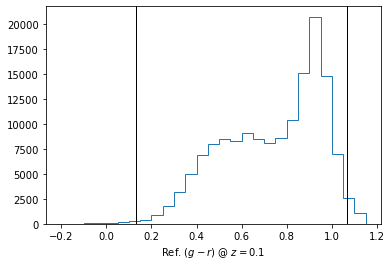

In [12]:
_ = pl.hist(derived['REF_GMR0P1'], histtype='step', bins=np.arange(-0.2, 1.2, 0.05))

pl.axvline(0.131, c='k', lw=1.0)
pl.axvline(1.067, c='k', lw=1.0)

pl.xlabel('Ref. $(g-r)$ @ $z=$0.1')

In [13]:
joined['RMAG_IDX'] = np.digitize(joined['MRH'], bins=np.arange(-24.0, -11.0, 2.))

In [14]:
np.sort(joined['RMAG_IDX'].data)

array([0, 1, 1, ..., 7, 7, 7])

Text(0, 0.5, "Counts per $\\Delta V' = 0.05$")

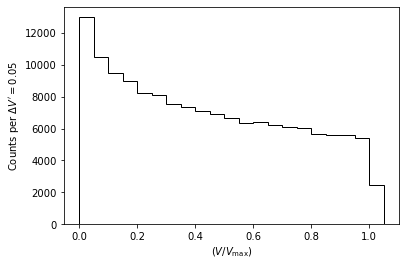

In [15]:
dV = 0.05
_  = pl.hist(derived['VONVMAX'], bins=np.arange(0.0, 1.1, dV), histtype='step', color='k')

pl.xlabel(r'$(V / V_{\rm max})$')
pl.ylabel('Counts per $\Delta V\' = {:.2f}$'.format(dV))

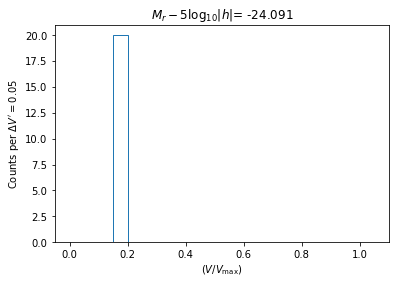

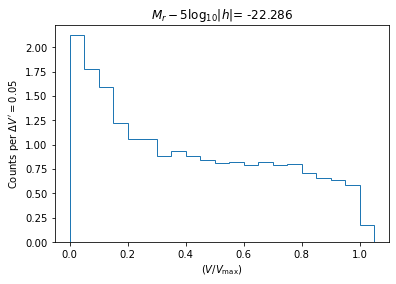

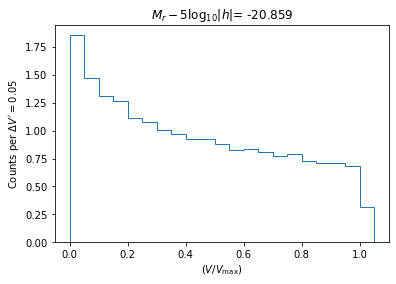

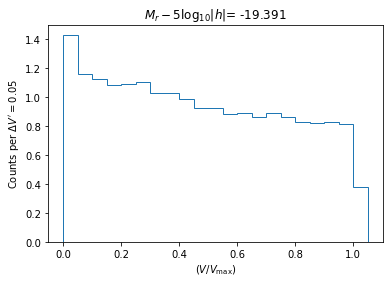

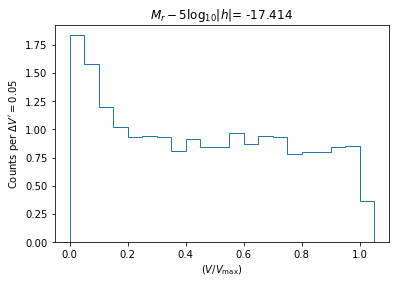

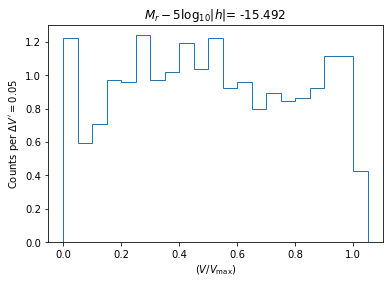

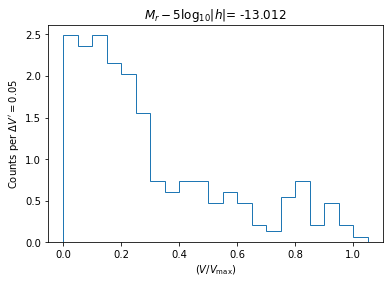

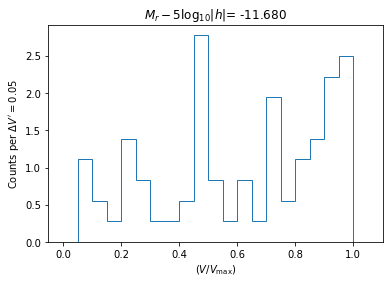

In [16]:
dV = 0.05

for idx in np.arange(0, 8, 1):
    sample  = joined[joined['RMAG_IDX'] == idx]
    _       = pl.hist(sample['VONVMAX'], bins=np.arange(0.0, 1.1, dV), histtype='step', density=True)

    med_mrh = np.median(sample['MRH'].data)
    
    title   = r'$M_r - 5 \log_{10}|h|$' + '= {:.3f}'.format(med_mrh)
    
    pl.xlabel(r'$(V / V_{\rm max})$')
    pl.ylabel('Counts per $\Delta V\' = {:.2f}$'.format(dV))

    pl.title(title)
        
    pl.show()

# Done.